In [5]:
import pandas as pd
import seaborn as sns
heart_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )

In [6]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


In [7]:
heart_data.target.value_counts()

1    115
0     97
Name: target, dtype: int64

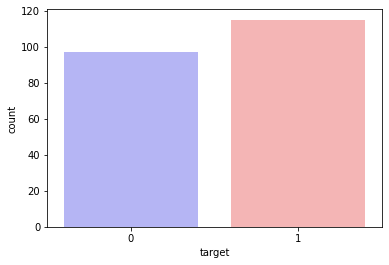

In [9]:
import matplotlib.pyplot as plt

sns.countplot(x="target", data=heart_data, palette="bwr")
plt.show()

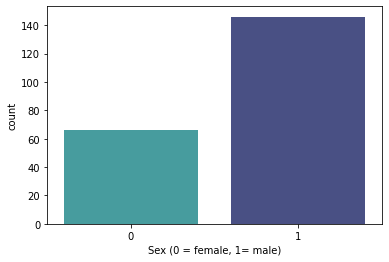

In [10]:
sns.countplot(x='sex', data=heart_data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

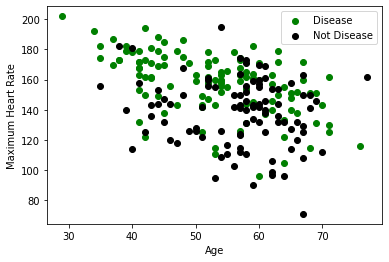

In [12]:
plt.scatter(x=heart_data.age[heart_data.target==1], y=heart_data.thalach[(heart_data.target==1)], c="green")
plt.scatter(x=heart_data.age[heart_data.target==0], y=heart_data.thalach[(heart_data.target==0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [14]:
X = heart_data.iloc[:,:-1].values
y = heart_data.iloc[:,13].values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [17]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [18]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)

In [20]:
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.79


In [21]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.79


In [22]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.83


In [23]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.79


In [24]:
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.81


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  5]
 [ 5 25]]


In [29]:
 from sklearn.metrics import classification_report
 print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.83      0.83      0.83        30

    accuracy                           0.81        53
   macro avg       0.81      0.81      0.81        53
weighted avg       0.81      0.81      0.81        53



In [40]:
evaluation_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv" )

In [41]:
evaluation_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,46,0,0,138,243,0,0,152,1,0.0,1,0,2
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2
4,47,1,2,108,243,0,1,152,0,0.0,2,0,2


In [47]:
prediction=classifier.predict(evaluation_data)

In [48]:
res = pd.DataFrame(prediction) 
res.index = evaluation_data.index 
res.columns = ['prediction']


from google.colab import files
res.to_csv('target.csv')         
files.download('target.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>